# Exploratory Data Analysis

In [10]:
import pandas as pd
import re

In [2]:
s_loc = './data/sample/'
d_sets = ['Black-Male-Names.csv','Black-Female-Names.csv','Hispanic-Male-Names.csv','Hispanic-Female-Names.csv','White-Male-Names.csv','White-Female-Names.csv','Indian-Male-Names.csv','Indian-Female-Names.csv']
d_sets

['Black-Male-Names.csv',
 'Black-Female-Names.csv',
 'Hispanic-Male-Names.csv',
 'Hispanic-Female-Names.csv',
 'White-Male-Names.csv',
 'White-Female-Names.csv',
 'Indian-Male-Names.csv',
 'Indian-Female-Names.csv']

In [3]:
map_info = {'gender': {0:'Male',1:'Female'}, 'race' : {0:'black',1:'hispanic',2:'white',3:'indian'}}
map_info

{'gender': {0: 'Male', 1: 'Female'},
 'race': {0: 'black', 1: 'hispanic', 2: 'white', 3: 'indian'}}

## 1) Indian Names vs Gender

In [4]:
ind_names = pd.DataFrame([])

In [6]:
for i in d_sets[-2:]:
    temp = pd.read_csv(s_loc+i)
    ind_names = ind_names.append(temp)

In [7]:
ind_names.head()

,name,gender,race,length,fl_is_v,ll_is_v,first_2,last_2,first_3,last_3
0,barjraj,0,3,7,0,0,ba,aj,bar,raj
1,ramdin verma,0,3,12,0,1,ra,ma,ram,rma
2,sharat,0,3,6,0,0,sh,at,sha,rat
3,birender,0,3,8,0,0,bi,er,bir,der
4,amit,0,3,4,1,0,am,it,ami,mit


In [8]:
ind_names.gender.value_counts()

0    7307
1    5685
Name: gender, dtype: int64

#### 1) univariate analysis

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
d_m = ind_names[ind_names.gender == 0]
d_f = ind_names[ind_names.gender == 1]
print("males :",len(d_m),"females :",len(d_f))

males : 7307 females : 5685


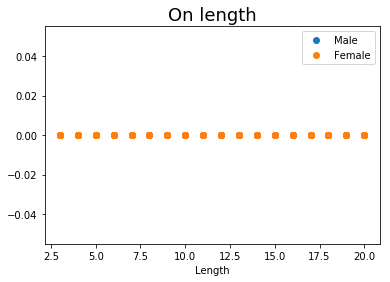

In [14]:
plt.title('On length',fontsize=18)
plt.xlabel('Length')
plt.plot(d_m.length,np.zeros_like(d_m.length),'o',label='Male')
plt.plot(d_f.length,np.zeros_like(d_f.length),'o',label='Female')
plt.legend(loc='upper right')
plt.show()

* Observation : Equal chance for both

/home/master/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


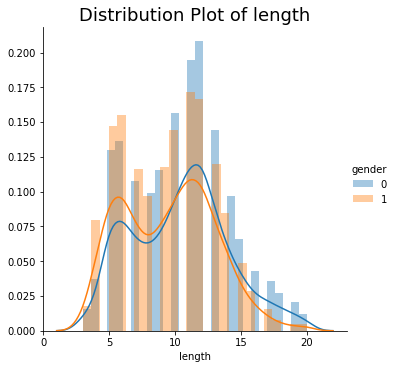

In [18]:
sns.FacetGrid(ind_names, hue="gender", size=5) \
.map(sns.distplot, "length") \
.add_legend();
plt.title("Distribution Plot of length",fontsize=18)
plt.show();

/home/master/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


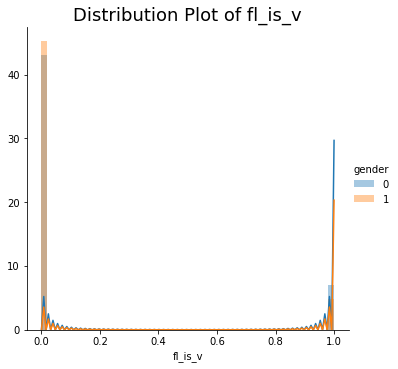

In [19]:
sns.FacetGrid(ind_names, hue="gender", size=5) \
.map(sns.distplot, "fl_is_v") \
.add_legend();
plt.title("Distribution Plot of fl_is_v",fontsize=18)
plt.show();

In [27]:
def print_vcounts(feature):
    print("male\n",d_m[feature].value_counts())
    print("female\n",d_f[feature].value_counts())

In [28]:
print_vcounts('fl_is_v')

male
 0    6282
1    1025
Name: fl_is_v, dtype: int64
female
 0    5139
1     546
Name: fl_is_v, dtype: int64


* Observation : equal chance for both

/home/master/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


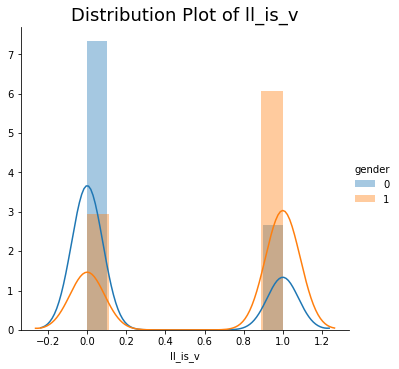

In [29]:
sns.FacetGrid(ind_names, hue="gender", size=5) \
.map(sns.distplot, "ll_is_v") \
.add_legend();
plt.title("Distribution Plot of ll_is_v",fontsize=18)
plt.show();

In [30]:
print_vcounts('ll_is_v')

male
 0    5354
1    1953
Name: ll_is_v, dtype: int64
female
 1    3832
0    1853
Name: ll_is_v, dtype: int64


In [32]:
ind_names.columns

Index(['name', 'gender', 'race', 'length', 'fl_is_v', 'll_is_v', 'first_2',
       'last_2', 'first_3', 'last_3'],
      dtype='object')

/home/master/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


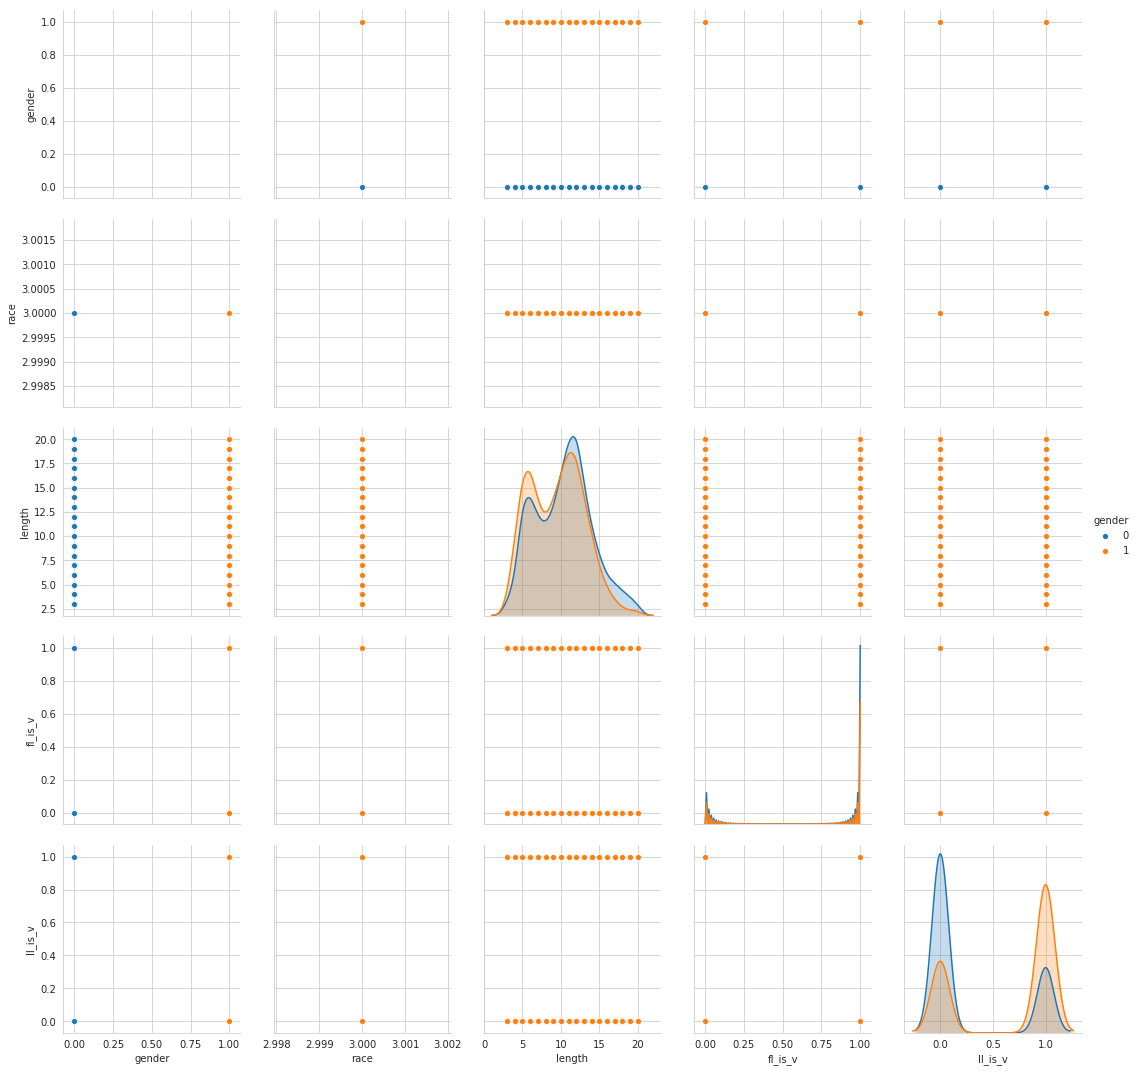

In [36]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(ind_names, hue="gender", size=3);
plt.show()

* Observation : last letter is vowel has high impact on gender, ll_is_v is True for most female names
